In [124]:
import pandas as pd

In [125]:
data_attack = pd.read_csv('../data/processed/attacks.csv')


data_attack.head()

C:\Users\Eric\AppData\Local\Temp\ipykernel_6280\866163543.py:1: DtypeWarning: Columns (85) have mixed types. Specify dtype option on import or set low_memory=False.
  data_attack = pd.read_csv('../data/processed/attacks.csv')


,Unnamed: 0,Flow ID,Source IP,Source Port,Destination IP,Destination Port,Protocol,Timestamp,Flow Duration,Total Fwd Packets,...,Active Std,Active Max,Active Min,Idle Mean,Idle Std,Idle Max,Idle Min,SimillarHTTP,Inbound,Label
0,112135,172.16.0.5-192.168.50.1-43315-21476-6,172.16.0.5,43315,192.168.50.1,21476,6,2018-12-01 13:34:27.406187,1,2,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0,1,TFTP
1,71303,172.16.0.5-192.168.50.1-43408-43698-6,172.16.0.5,43408,192.168.50.1,43698,6,2018-12-01 13:34:27.421318,48,2,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0,1,TFTP
2,62328,172.16.0.5-192.168.50.1-43441-51949-6,172.16.0.5,43441,192.168.50.1,51949,6,2018-12-01 13:34:27.427305,44,2,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0,1,TFTP
3,12960,172.16.0.5-192.168.50.1-20668-20668-6,172.16.0.5,20668,192.168.50.1,20668,6,2018-12-01 13:34:27.427705,8245171,4,...,0.0,69.0,69.0,8245101.0,0.0,8245101.0,8245101.0,0,1,TFTP
4,28697,172.16.0.5-192.168.50.1-43565-23345-6,172.16.0.5,43565,192.168.50.1,23345,6,2018-12-01 13:34:27.444628,1,2,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0,1,TFTP


In [126]:
data_attack.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1177310 entries, 0 to 1177309
Data columns (total 88 columns):
 #   Column                       Non-Null Count    Dtype  
---  ------                       --------------    -----  
 0   Unnamed: 0                   1177310 non-null  int64  
 1   Flow ID                      1177310 non-null  object 
 2   Source IP                    1177310 non-null  object 
 3   Source Port                  1177310 non-null  int64  
 4   Destination IP               1177310 non-null  object 
 5   Destination Port             1177310 non-null  int64  
 6   Protocol                     1177310 non-null  int64  
 7   Timestamp                    1177310 non-null  object 
 8   Flow Duration                1177310 non-null  int64  
 9   Total Fwd Packets            1177310 non-null  int64  
 10  Total Backward Packets       1177310 non-null  int64  
 11  Total Length of Fwd Packets  1177310 non-null  float64
 12  Total Length of Bwd Packets  1177310 non-n

In [127]:
data_attack['Label'].value_counts()

Label
DrDoS_DNS        199858
DrDoS_SNMP        99973
DrDoS_SSDP        99972
DrDoS_NetBIOS     99955
DrDoS_UDP         99951
DrDoS_MSSQL       99950
TFTP              99794
DrDoS_NTP         98855
Portmap           97503
UDP-lag           88991
Syn               87251
BENIGN             5137
WebDDoS             120
Name: count, dtype: int64

In [128]:
""" import pandas as pd
import numpy as np

def reduce_dataframe_size(df, target_size_mb=30, label_column='label'):
    # Get the original size of the DataFrame
    original_size = df.memory_usage(deep=True).sum() / 1e6  # Size in MB
    
    # If the DataFrame is already smaller than the target size, return it as is
    if original_size <= target_size_mb:
        return df
    
    # Calculate the fraction of rows to keep
    fraction = target_size_mb / original_size
    
    # Get unique labels
    unique_labels = df[label_column].unique()
    
    # Initialize the reduced DataFrame with rows containing unique labels
    reduced_df = df[df[label_column].isin(unique_labels)].drop_duplicates(subset=[label_column])
    
    # Calculate how many more rows we can add
    remaining_rows = int(fraction * len(df)) - len(reduced_df)
    
    if remaining_rows > 0:
        # Randomly sample the remaining rows
        additional_rows = df[~df.index.isin(reduced_df.index)].sample(n=remaining_rows, random_state=42)
        reduced_df = pd.concat([reduced_df, additional_rows])
    
    return reduced_df

# Apply the function to your DataFrame
reduced_data_attack = reduce_dataframe_size(data_attack, target_size_mb=29, label_column='Label')

# Save the reduced DataFrame to CSV
reduced_data_attack.to_csv('../data/processed/reduced_data_attack.csv', index=False)

# Verify the size of the saved file
import os
 """

" import pandas as pd\nimport numpy as np\n\ndef reduce_dataframe_size(df, target_size_mb=30, label_column='label'):\n    # Get the original size of the DataFrame\n    original_size = df.memory_usage(deep=True).sum() / 1e6  # Size in MB\n    \n    # If the DataFrame is already smaller than the target size, return it as is\n    if original_size <= target_size_mb:\n        return df\n    \n    # Calculate the fraction of rows to keep\n    fraction = target_size_mb / original_size\n    \n    # Get unique labels\n    unique_labels = df[label_column].unique()\n    \n    # Initialize the reduced DataFrame with rows containing unique labels\n    reduced_df = df[df[label_column].isin(unique_labels)].drop_duplicates(subset=[label_column])\n    \n    # Calculate how many more rows we can add\n    remaining_rows = int(fraction * len(df)) - len(reduced_df)\n    \n    if remaining_rows > 0:\n        # Randomly sample the remaining rows\n        additional_rows = df[~df.index.isin(reduced_df.index)]

In [129]:
""" file_size_mb = os.path.getsize('../data/processed/reduced_data_attack.csv') / 1e6
print(f"Size of the reduced CSV file: {file_size_mb:.2f} MB") """

' file_size_mb = os.path.getsize(\'../data/processed/reduced_data_attack.csv\') / 1e6\nprint(f"Size of the reduced CSV file: {file_size_mb:.2f} MB") '

In [130]:
data_attack.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1177310 entries, 0 to 1177309
Data columns (total 88 columns):
 #   Column                       Non-Null Count    Dtype  
---  ------                       --------------    -----  
 0   Unnamed: 0                   1177310 non-null  int64  
 1   Flow ID                      1177310 non-null  object 
 2   Source IP                    1177310 non-null  object 
 3   Source Port                  1177310 non-null  int64  
 4   Destination IP               1177310 non-null  object 
 5   Destination Port             1177310 non-null  int64  
 6   Protocol                     1177310 non-null  int64  
 7   Timestamp                    1177310 non-null  object 
 8   Flow Duration                1177310 non-null  int64  
 9   Total Fwd Packets            1177310 non-null  int64  
 10  Total Backward Packets       1177310 non-null  int64  
 11  Total Length of Fwd Packets  1177310 non-null  float64
 12  Total Length of Bwd Packets  1177310 non-n

In [131]:
list(data_attack['Label'].unique())

['TFTP',
 'BENIGN',
 'DrDoS_DNS',
 'DrDoS_MSSQL',
 'DrDoS_NetBIOS',
 'DrDoS_NTP',
 'DrDoS_SNMP',
 'DrDoS_SSDP',
 'DrDoS_UDP',
 'Syn',
 'UDP-lag',
 'WebDDoS',
 'Portmap']

In [132]:
list(data_attack.columns)

['Unnamed: 0',
 'Flow ID',
 'Source IP',
 'Source Port',
 'Destination IP',
 'Destination Port',
 'Protocol',
 'Timestamp',
 'Flow Duration',
 'Total Fwd Packets',
 'Total Backward Packets',
 'Total Length of Fwd Packets',
 'Total Length of Bwd Packets',
 'Fwd Packet Length Max',
 'Fwd Packet Length Min',
 'Fwd Packet Length Mean',
 'Fwd Packet Length Std',
 'Bwd Packet Length Max',
 'Bwd Packet Length Min',
 'Bwd Packet Length Mean',
 'Bwd Packet Length Std',
 'Flow Bytes/s',
 'Flow Packets/s',
 'Flow IAT Mean',
 'Flow IAT Std',
 'Flow IAT Max',
 'Flow IAT Min',
 'Fwd IAT Total',
 'Fwd IAT Mean',
 'Fwd IAT Std',
 'Fwd IAT Max',
 'Fwd IAT Min',
 'Bwd IAT Total',
 'Bwd IAT Mean',
 'Bwd IAT Std',
 'Bwd IAT Max',
 'Bwd IAT Min',
 'Fwd PSH Flags',
 'Bwd PSH Flags',
 'Fwd URG Flags',
 'Bwd URG Flags',
 'Fwd Header Length',
 'Bwd Header Length',
 'Fwd Packets/s',
 'Bwd Packets/s',
 'Min Packet Length',
 'Max Packet Length',
 'Packet Length Mean',
 'Packet Length Std',
 'Packet Length Varianc

#### Data analysis 

In [133]:

categorical_columns = data_attack.select_dtypes(include=['object']).columns

for column in categorical_columns:
    print(f"\nUnique values in {column}:")
    print(data_attack[column].value_counts())
    print(f"Total unique values: {data_attack[column].nunique()}")


Unique values in Flow ID:
Flow ID
172.16.0.5-192.168.50.1-0-0-0             43
192.168.50.253-224.0.0.5-0-0-0            37
192.168.50.254-224.0.0.5-0-0-0            34
8.0.6.4-8.6.0.1-0-0-0                     30
255.255.255.255-0.0.0.0-67-68-17          13
                                          ..
172.16.0.5-192.168.50.1-51735-61633-17     1
172.16.0.5-192.168.50.1-51741-28150-17     1
172.16.0.5-192.168.50.1-51746-13013-17     1
172.16.0.5-192.168.50.1-51760-7181-17      1
172.16.0.5-192.168.50.4-857-9612-17        1
Name: count, Length: 1157506, dtype: int64
Total unique values: 1157506

Unique values in Source IP:
Source IP
172.16.0.5        1171317
192.168.50.6         1757
192.168.50.8         1390
192.168.50.7          811
192.168.50.1          644
                   ...   
216.58.219.206          1
172.217.3.100           1
172.217.12.193          1
54.243.214.170          1
52.85.89.10             1
Name: count, Length: 284, dtype: int64
Total unique values: 284

Unique v

In [134]:
# Basic statistics of Flow Duration
print(data_attack['Flow Duration'].describe())

count    1.177310e+06
mean     1.371868e+06
std      9.348029e+06
min      0.000000e+00
25%      1.000000e+00
50%      1.000000e+00
75%      7.700000e+01
max      1.200000e+08
Name: Flow Duration, dtype: float64


Flow Duration is the amount of time a single "conversation" or exchange of data lasts on a network.

- The very low median (1 microsecond) suggests that a lot of your traffic consists of very short connections. This could be normal for some protocols, but it's also characteristic of certain DDoS attacks like UDP floods.
- The large difference between the median (1) and mean (1,371,868) indicates that your data is heavily skewed. There are likely a few very long connections pulling the average up.
- The maximum of 120 seconds might represent legitimate long-lived connections, or it could be part of a slow-rate DDoS attack designed to keep connections open for long periods.
- The high standard deviation shows that there's a wide variety in your flow durations, which could make it challenging to identify "normal" behavior.

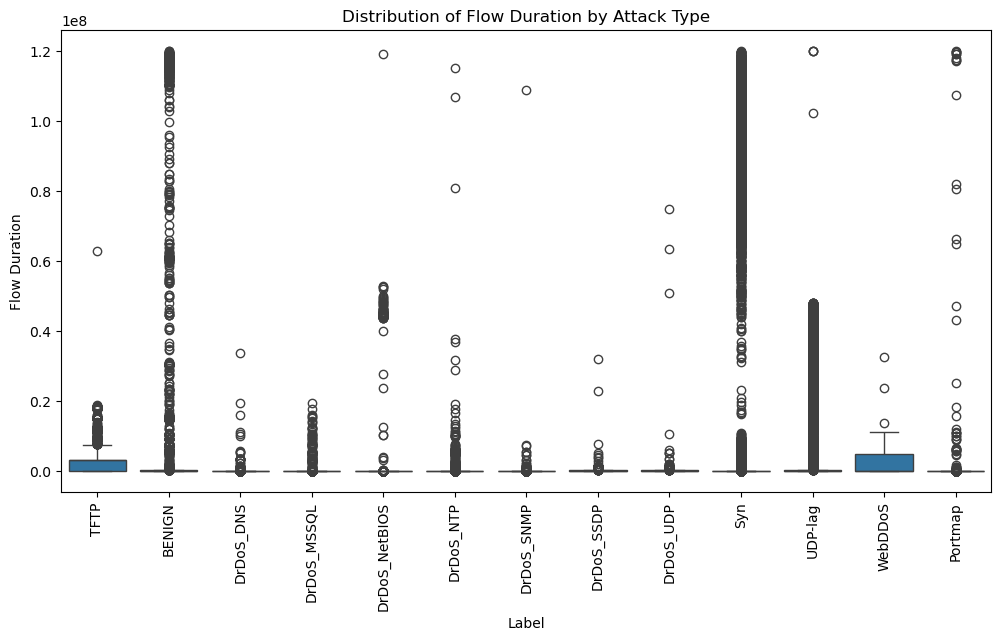

In [135]:
# Distribution of Flow Duration for each attack type
import matplotlib.pyplot as plt
import seaborn as sns

plt.figure(figsize=(12, 6))
sns.boxplot(x='Label', y='Flow Duration', data=data_attack)
plt.xticks(rotation=90)
plt.title('Distribution of Flow Duration by Attack Type')
plt.show()


- BENIGN Traffic:
Has the widest spread of flow durations.
Shows many outliers (circles) extending up to the maximum duration.
This variability is expected for normal traffic, as legitimate users engage in various activities with different duration needs.
- WebDDoS:
Shows a slightly higher median and more spread than most other attack types.
Has several outliers extending to higher durations.
This might indicate that WebDDoS attacks attempt to mimic normal web traffic patterns to some extent.
- TFTP and UDP-lag:
Both show slightly more spread in their distributions compared to other attack types.
TFTP, in particular, has a noticeably higher median, suggesting these attacks tend to have longer flow durations on average.
- Syn:
Despite being known for keeping connections open, it shows a very compressed distribution.
Has many outliers at higher durations, which aligns with the nature of SYN flood attacks.
- DrDoS Attacks (DNS, SNMP, SSDP, NTP, etc.):
All show very tight distributions near zero duration.
This is consistent with the nature of reflection attacks, which typically involve quick, high-volume traffic bursts.
- Portmap:
Shows a very compressed distribution similar to the DrDoS attacks.
This suggests Portmap attacks in this dataset also involve rapid, short-duration flows.
- The presence of outliers across all categories suggests that flow duration alone is not sufficient to distinguish attacks, and other features must be considered for accurate classification

In [136]:
# Compare mean Flow Duration for each attack type
mean_duration = data_attack.groupby('Label')['Flow Duration'].mean().sort_values(ascending=False)
print("Mean Flow Duration by Attack Type:")
print(mean_duration)

Mean Flow Duration by Attack Type:
Label
BENIGN           1.206412e+07
Syn              9.370633e+06
UDP-lag          5.736254e+06
WebDDoS          2.249438e+06
TFTP             1.998980e+06
DrDoS_UDP        9.073762e+04
DrDoS_SSDP       8.182930e+04
DrDoS_NetBIOS    3.549471e+04
Portmap          1.963452e+04
DrDoS_NTP        1.667822e+04
DrDoS_MSSQL      5.708435e+03
DrDoS_SNMP       1.688068e+03
DrDoS_DNS        1.062072e+03
Name: Flow Duration, dtype: float64


Benign traffic has the longest average duration, which makes sense as normal users interact with services for longer periods.
Most DDoS attacks have very short durations, often fractions of a second. This is because they typically involve sending many small requests rapidly to overwhelm the target.
Some attacks (Syn, UDP-lag) have longer durations, possibly because they're trying to keep connections open or create lasting effects.
The DrDoS (Distributed Reflection Denial of Service) attacks generally have very short durations, as they involve quick, reflected traffic from multiple sources.

In [137]:
# Basic statistics of Total Fwd Packets
print(data_attack['Total Fwd Packets'].describe())

count    1.177310e+06
mean     8.710738e+00
std      2.876617e+02
min      1.000000e+00
25%      2.000000e+00
50%      2.000000e+00
75%      2.000000e+00
max      9.980200e+04
Name: Total Fwd Packets, dtype: float64


- The fact that 75% of flows have 2 or fewer packets suggests a prevalence of very short interactions. This could be indicative of certain types of DDoS attacks that send minimal data to overwhelm systems.
- The presence of flows with very high packet counts (up to 99,802) could represent volume-based DDoS attacks attempting to overwhelm targets with a large number of packets.
- The large difference between the mean (9 packets) and max (99,802 packets) indicates a wide variety of traffic patterns. This could make it challenging to set simple thresholds for attack detection.

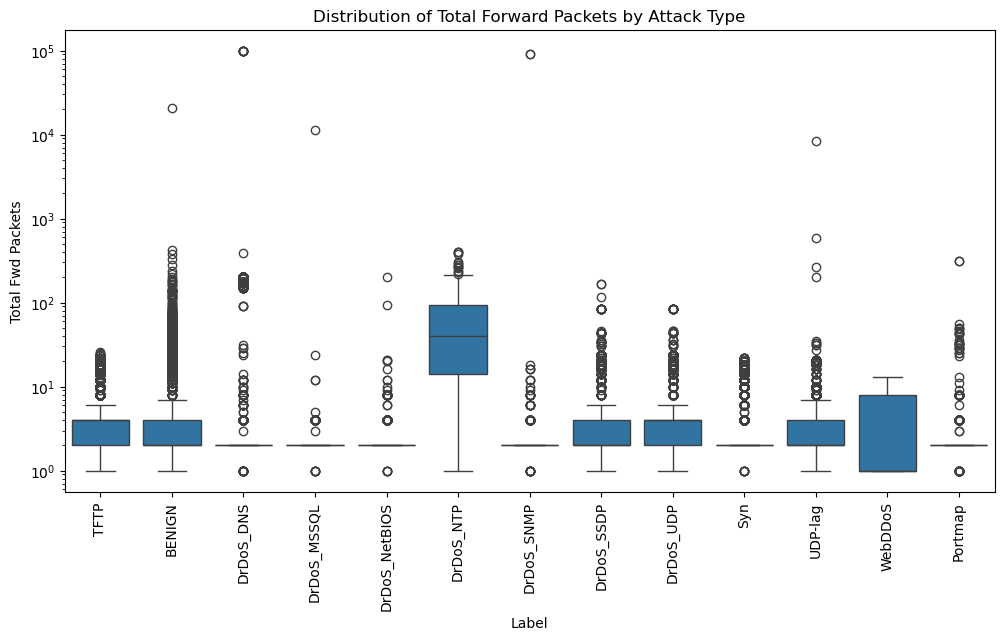

In [138]:
# Distribution of Total Fwd Packets for each attack type
plt.figure(figsize=(12, 6))
sns.boxplot(x='Label', y='Total Fwd Packets', data=data_attack)
plt.xticks(rotation=90)
plt.title('Distribution of Total Forward Packets by Attack Type')
plt.yscale('log')  # Using log scale due to potential large differences
plt.show()

- BENIGN Traffic:

Shows a wide range of forward packet counts, from very low to very high.
Has many outliers, indicating diverse normal network behavior.
This variability is expected in legitimate traffic.
- DrDoS_NTP:

Stands out with a significantly higher median and larger box, indicating more forward packets on average.
This suggests NTP reflection attacks in this dataset involve sending more packets than other attack types.
- WebDDoS:

Shows a wider range than most other attack types, with a higher median.
This might indicate attempts to mimic normal web traffic patterns.
- DrDoS Attacks (DNS, SNMP, SSDP, etc.):

Generally show very low forward packet counts, with medians close to the minimum.
This is consistent with reflection attacks, where the attacker sends few packets to amplify the response.

- Most DDoS attacks in this dataset are characterized by a low number of forward packets, likely focusing on sending minimal data to trigger larger responses.
DrDoS_NTP stands out as using significantly more forward packets, which could make it easier to detect but also more impactful.
BENIGN traffic shows the most variability, reinforcing the challenge of distinguishing some attacks from normal traffic.
The low forward packet counts in many attack types emphasize the efficiency of these DDoS methods, using minimal resources to cause significant impact.
WebDDoS and TFTP attacks show slightly different patterns, possibly due to the nature of the protocols they exploit.


In [139]:
# Compare mean Total Fwd Packets for each attack type
mean_fwd_packets = data_attack.groupby('Label')['Total Fwd Packets'].mean().sort_values(ascending=False)
print("Mean Total Forward Packets by Attack Type:")
print(mean_fwd_packets)

Mean Total Forward Packets by Attack Type:
Label
DrDoS_NTP        63.606919
BENIGN           11.556161
DrDoS_DNS         6.412473
DrDoS_SNMP        3.835065
DrDoS_UDP         3.774009
DrDoS_SSDP        3.712199
WebDDoS           3.600000
TFTP              3.426238
Syn               3.130302
UDP-lag           3.033970
DrDoS_MSSQL       2.115768
Portmap           2.020205
DrDoS_NetBIOS     2.008694
Name: Total Fwd Packets, dtype: float64


- This confirms our observation from the box plot that NTP reflection attacks in this dataset involve sending many more packets than other attacks.NTP (Network Time Protocol) attacks often exploit the amplification factor of NTP servers, which might explain the higher packet count.
- BENIGN Normal user behavior often involves more substantial data exchanges, resulting in more packets.
- Variety in Attack Strategies: The wide range of mean packet counts (from 2 to 63) shows that different DDoS attacks employ varied strategies in terms of packet volume.
- Efficiency of Reflection Attacks: Many DrDoS attacks (except NTP) use relatively few packets, highlighting their efficiency in causing large impacts with minimal initial traffic.
NTP as an Outlier: The high packet count for NTP attacks suggests they might be easier to detect based on volume alone, but potentially more damaging.
Benign Traffic Characteristics: The higher packet count for benign traffic underscores the challenge in differentiating some low-volume attacks from normal traffic fluctuations.
Potential for Camouflage: Attacks with packet counts closer to benign traffic (like WebDDoS) might be attempting to blend in with normal traffic patterns.

In [140]:
# Basic statistics of Total Backward Packets
print(data_attack['Total Backward Packets'].describe())

count    1.177310e+06
mean     1.155923e-01
std      2.935552e+01
min      0.000000e+00
25%      0.000000e+00
50%      0.000000e+00
75%      0.000000e+00
max      3.170000e+04
Name: Total Backward Packets, dtype: float64


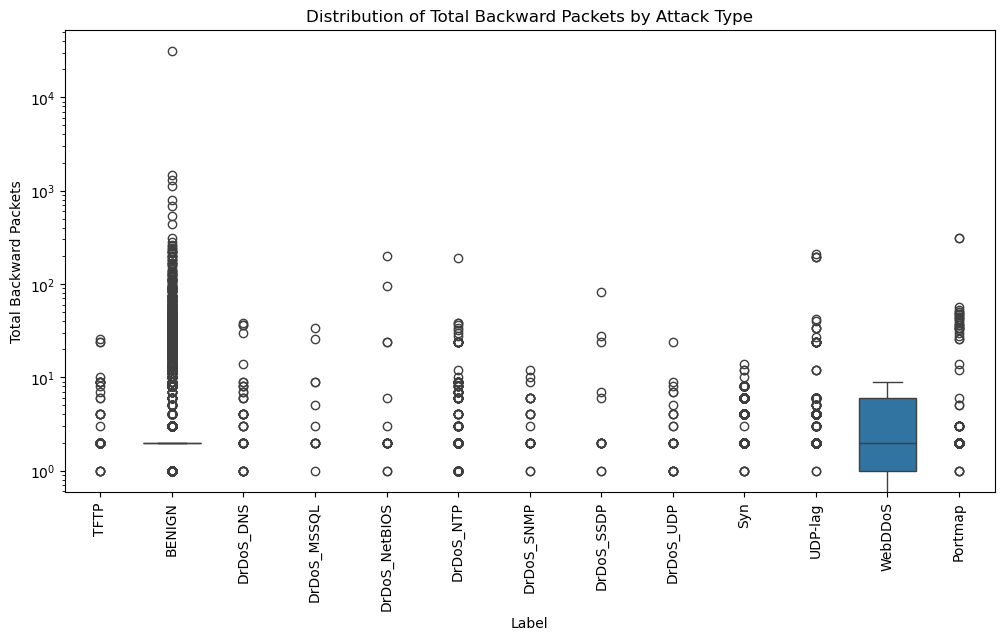

In [141]:
# Distribution of Total Backward Packets for each attack type
plt.figure(figsize=(12, 6))
sns.boxplot(x='Label', y='Total Backward Packets', data=data_attack)
plt.xticks(rotation=90)
plt.title('Distribution of Total Backward Packets by Attack Type')
plt.yscale('log')  # Using log scale due to potential large differences
plt.show()


- WebDDoS:

Stands out with a noticeably larger box, indicating more variation in backward packets.
This could be due to attempts to mimic normal web traffic patterns, which typically involve request-response cycles.
- DrDoS Attacks (DNS, SNMP, SSDP, NTP, etc.):

Generally show very low backward packet counts, with medians at or near zero.
This is consistent with reflection attacks, where the goal is to amplify traffic from the reflector to the victim, not to receive responses.
- Confirmation of Unidirectional Traffic: The plot confirms that most DDoS attacks in this dataset generate little to no response traffic, focusing on overwhelming the target with outgoing packets.
Reflection Attack Characteristics: The very low backward packet counts for DrDoS attacks support their classification as reflection/amplification attacks, where the attacker's goal is to generate large volumes of traffic from reflector servers to the victim.
WebDDoS Complexity: The higher variability in WebDDoS backward packets suggests these attacks might be more sophisticated, potentially mimicking normal web traffic patterns to evade detection.
BENIGN Traffic Distinctiveness: The wide range of backward packet counts in benign traffic stands in stark contrast to most attack types, potentially offering a strong feature for distinguishing normal traffic from attacks.
Potential for False Positives: The presence of benign traffic with low backward packet counts (as seen in the outliers) highlights the challenge of distinguishing some legitimate traffic from attacks based solely on this feature.
Attack Efficiency: The low backward packet counts across most attack types underscore the efficiency of these DDoS methods, using minimal two-way communication to cause significant impact.

In [142]:
# Compare mean Total Backward Packets for each attack type
mean_bwd_packets = data_attack.groupby('Label')['Total Backward Packets'].mean().sort_values(ascending=False)
print("Mean Total Backward Packets by Attack Type:")
print(mean_bwd_packets)

Mean Total Backward Packets by Attack Type:
Label
BENIGN           14.304458
WebDDoS           3.116667
Syn               0.352741
UDP-lag           0.293580
Portmap           0.021876
DrDoS_NTP         0.016560
TFTP              0.003848
DrDoS_NetBIOS     0.003812
DrDoS_SSDP        0.001670
DrDoS_DNS         0.001556
DrDoS_UDP         0.001091
DrDoS_SNMP        0.001080
DrDoS_MSSQL       0.000990
Name: Total Backward Packets, dtype: float64


- Clear Distinction of Benign Traffic: The significantly higher backward packet count for benign traffic provides a strong differentiator from most attack types.
Variation in Attack Strategies: The range of backward packet counts across different attack types (from 0.001 to 3.12) illustrates the variety of DDoS attack strategies.
Reflection Attack Confirmation: The extremely low backward packet counts for most DrDoS attacks confirm their nature as reflection/amplification attacks.
WebDDoS Complexity: The higher backward packet count for WebDDoS suggests these attacks might be more sophisticated, potentially attempting to blend in with normal web traffic.
Efficiency of Attacks: Most attack types show very low backward packet counts, highlighting their efficiency in causing impact with minimal two-way communication.
Potential Detection Strategies: The stark contrast between benign traffic and most attack types in terms of backward packets suggests this could be a valuable feature for DDoS detection algorithms.
Challenges in Detection: The presence of some attacks with non-zero backward packets (especially WebDDoS) indicates that more complex detection methods may be needed to distinguish these from legitimate traffic.
Asymmetry in Attack Traffic: When compared with the forward packet counts we analyzed earlier, this data reinforces the highly asymmetrical nature of most DDoS attacks in this dataset.

In [143]:
# Basic statistics of Total Length of Fwd Packets
print(data_attack['Total Length of Fwd Packets'].describe())

count    1.177310e+06
mean     3.649227e+03
std      1.112667e+04
min      0.000000e+00
25%      4.580000e+02
50%      1.032000e+03
75%      2.944000e+03
max      1.760000e+05
Name: Total Length of Fwd Packets, dtype: float64


- The mean (3,649) being much higher than the median (1,032) suggests that while most flows involve relatively small amounts of data, there are some flows with very large data transfers that are pulling the average up.
- Wide Range of Packet Sizes:

The large difference between min (0) and max (176,000) bytes indicates that the dataset includes both very small and very large data transfers.
This wide range could represent various types of DDoS attacks as well as normal traffic patterns.


Skewed Distribution:

The mean (3,649) being much higher than the median (1,032) suggests that while most flows involve relatively small amounts of data, there are some flows with very large data transfers that are pulling the average up.


Potential Attack Patterns:

Flows with very small total lengths (close to 0) could represent certain types of flood attacks that send minimal data.
Flows with very large total lengths could represent volumetric DDoS attacks or could be legitimate large data transfers.


Variability in Attack Strategies:

The high standard deviation suggests a wide variety of traffic patterns, which could indicate diverse DDoS attack strategies or a mix of attack and normal traffic.

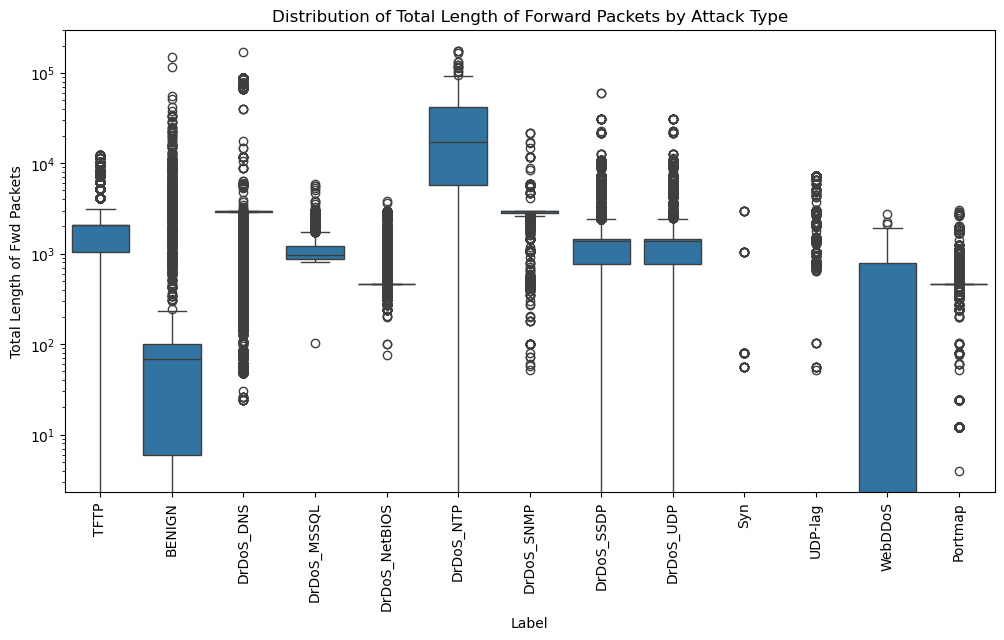

In [144]:
# Distribution of Total Length of Fwd Packets for each attack type
plt.figure(figsize=(12, 6))
sns.boxplot(x='Label', y='Total Length of Fwd Packets', data=data_attack)
plt.xticks(rotation=90)
plt.title('Distribution of Total Length of Forward Packets by Attack Type')
plt.yscale('log')  # Using log scale due to potential large differences
plt.show()

- Variety in Attack Strategies: The wide range of packet lengths across different attack types illustrates diverse DDoS strategies, from those using small packets (like Syn floods) to those leveraging large packet sizes (like NTP amplification).
Amplification Attacks: The large packet lengths seen in DrDoS_NTP clearly demonstrate the amplification effect, where small queries result in large responses.
Protocol Exploitation: Different protocols (NTP, DNS, SNMP) show varying patterns in packet lengths, reflecting how attackers exploit specific protocol characteristics.
Benign Traffic Characteristics: The wide range in benign traffic underscores the challenge in distinguishing some attacks from normal traffic fluctuations based solely on packet length.
Potential for Volumetric Attacks: High outliers across multiple attack types indicate the potential for volumetric DDoS attacks that aim to overwhelm targets with large amounts of data.
Detection Challenges: The overlap in packet length distributions between some attack types and benign traffic highlights the need for multi-faceted detection approaches.

In [145]:
# Compare mean Total Length of Fwd Packets for each attack type
mean_fwd_length = data_attack.groupby('Label')['Total Length of Fwd Packets'].mean().sort_values(ascending=False)
print("Mean Total Length of Forward Packets by Attack Type:")
print(mean_fwd_length)

Mean Total Length of Forward Packets by Attack Type:
Label
DrDoS_NTP        27804.600587
DrDoS_DNS         2947.094667
DrDoS_SNMP        2772.886599
TFTP              1759.041125
DrDoS_SSDP        1385.742268
DrDoS_UDP         1374.673910
DrDoS_MSSQL       1153.242261
BENIGN             768.077088
DrDoS_NetBIOS      467.621870
Portmap            461.192866
WebDDoS            372.550000
UDP-lag            213.056669
Syn                  0.343927
Name: Total Length of Fwd Packets, dtype: float64


- Reflection Attack Effectiveness: The high packet lengths for DrDoS attacks (especially NTP, DNS, and SNMP) demonstrate why these attacks are popular - they generate large amounts of traffic with minimal effort from the attacker.
Protocol Exploitation: Different protocols offer varying levels of amplification, as seen in the range of packet lengths across DrDoS attacks.
Efficiency of Syn Attacks: The tiny packet size for Syn attacks shows how they can be effective with minimal data, focusing on overwhelming connection handling rather than bandwidth.
Variety in Attack Strategies: The wide range of packet lengths (from 0.34 to 27,804.60 bytes) illustrates the diverse strategies employed in different DDoS attacks.
Challenges in Detection: Some attacks (like WebDDoS) have average packet lengths closer to benign traffic, highlighting the need for more sophisticated detection methods beyond just packet size analysis.
Volumetric vs. Protocol Attacks: This data clearly shows the difference between volumetric attacks (like DrDoS_NTP) that send large amounts of data, and protocol attacks (like Syn) that exploit specific network behaviors with minimal data.

count    1.177310e+06
mean     8.130709e+01
std      5.451215e+04
min      0.000000e+00
25%      0.000000e+00
50%      0.000000e+00
75%      0.000000e+00
max      5.842950e+07
Name: Total Length of Bwd Packets, dtype: float64


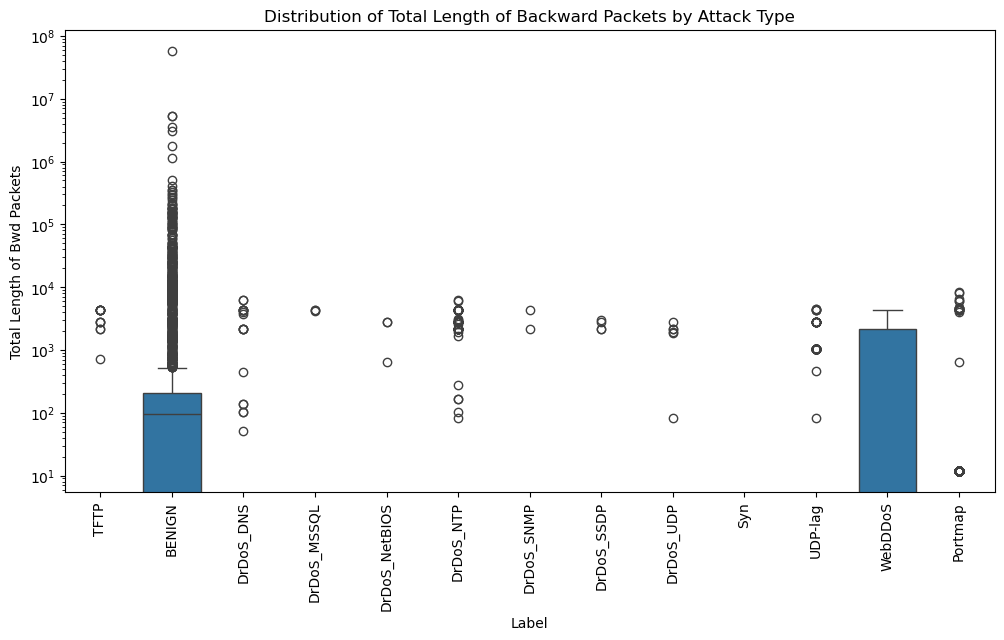

Mean Total Length of Backward Packets by Attack Type:
Label
BENIGN           18500.482967
WebDDoS            757.133333
DrDoS_NTP            2.376956
UDP-lag              1.437224
Portmap              0.936135
TFTP                 0.436219
DrDoS_DNS            0.258213
DrDoS_MSSQL          0.126923
DrDoS_UDP            0.109954
DrDoS_SSDP           0.100988
DrDoS_SNMP           0.064377
DrDoS_NetBIOS        0.063148
Syn                  0.000000
Name: Total Length of Bwd Packets, dtype: float64


In [146]:
# Basic statistics of Total Length of Bwd Packets
print(data_attack['Total Length of Bwd Packets'].describe())

# Distribution of Total Length of Bwd Packets for each attack type
plt.figure(figsize=(12, 6))
sns.boxplot(x='Label', y='Total Length of Bwd Packets', data=data_attack)
plt.xticks(rotation=90)
plt.title('Distribution of Total Length of Backward Packets by Attack Type')
plt.yscale('log')  # Using log scale due to potential large differences
plt.show()

# Compare mean Total Length of Bwd Packets for each attack type
mean_bwd_length = data_attack.groupby('Label')['Total Length of Bwd Packets'].mean().sort_values(ascending=False)
print("Mean Total Length of Backward Packets by Attack Type:")
print(mean_bwd_length)

- Asymmetry in DDoS Attacks: The very low or zero backward packet lengths for most attack types highlight the asymmetrical nature of DDoS attacks, where the focus is on sending traffic rather than receiving responses.
- Reflection Attack Characteristics: The minimal backward packet lengths in DrDoS attacks confirm their nature as reflection/amplification attacks, where the attacker aims to generate outgoing traffic from reflector servers with minimal return traffic.
- WebDDoS Complexity: The higher backward packet length for WebDDoS suggests these attacks might be more sophisticated, potentially involving some level of completed connections to mimic legitimate web traffic.
- Effectiveness of Syn Attacks: The zero backward packet length for Syn attacks demonstrates their efficiency in overwhelming targets without completing connections.
- Benign Traffic Distinctiveness: The significantly higher backward packet lengths for benign traffic provide a strong differentiator from most attack types, though this also highlights the challenge of identifying more sophisticated attacks that mimic normal traffic patterns.
- Detection Strategies: This data suggests that the ratio of forward to backward packet lengths could be a powerful feature for identifying many types of DDoS attacks, especially when combined with other traffic characteristics.
- Potential False Positives: The presence of some backward packets in certain attack types (like WebDDoS) indicates that more nuanced detection methods may be needed to distinguish these from legitimate traffic fluctuations.


Statistics for Fwd Packet Length Max:
count    1.177310e+06
mean     5.931347e+02
std      5.182945e+02
min      0.000000e+00
25%      2.290000e+02
50%      4.080000e+02
75%      8.370000e+02
max      3.583000e+03
Name: Fwd Packet Length Max, dtype: float64

Statistics for Fwd Packet Length Min:
count    1.177310e+06
mean     5.801905e+02
std      5.242952e+02
min      0.000000e+00
25%      2.290000e+02
50%      3.980000e+02
75%      8.360000e+02
max      2.020000e+03
Name: Fwd Packet Length Min, dtype: float64

Statistics for Fwd Packet Length Mean:
count    1.177310e+06
mean     5.888812e+02
std      5.196089e+02
min      0.000000e+00
25%      2.290000e+02
50%      4.010000e+02
75%      8.360000e+02
max      2.020000e+03
Name: Fwd Packet Length Mean, dtype: float64

Statistics for Fwd Packet Length Std:
count    1.177310e+06
mean     5.047343e+00
std      1.864030e+01
min      0.000000e+00
25%      0.000000e+00
50%      0.000000e+00
75%      0.000000e+00
max      1.178542e+03
Name: 

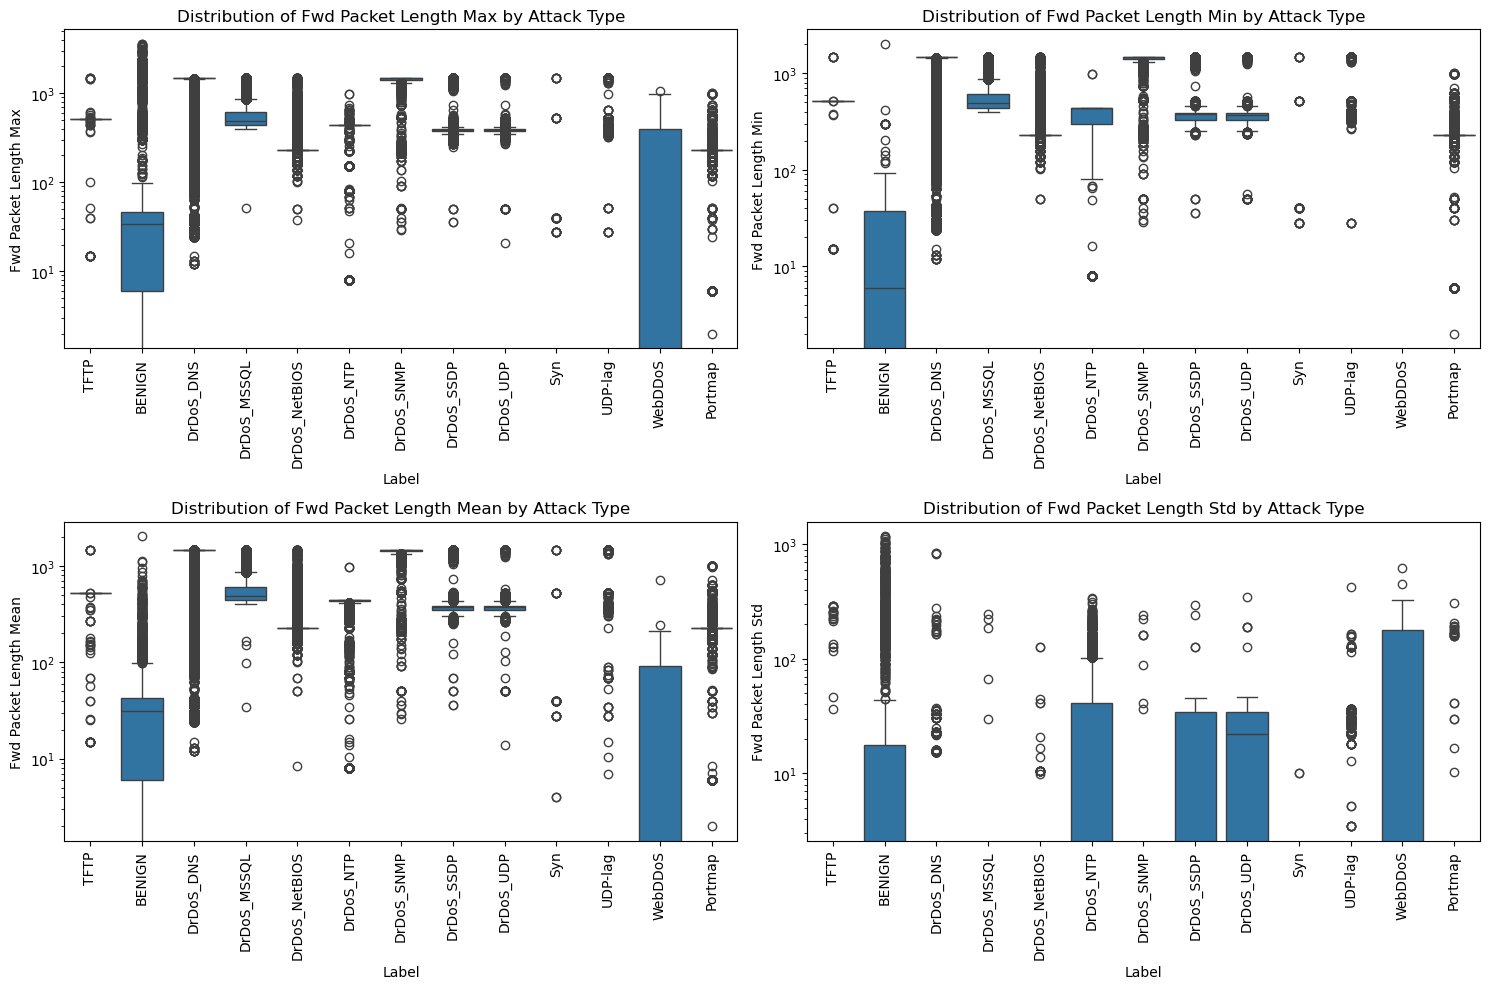

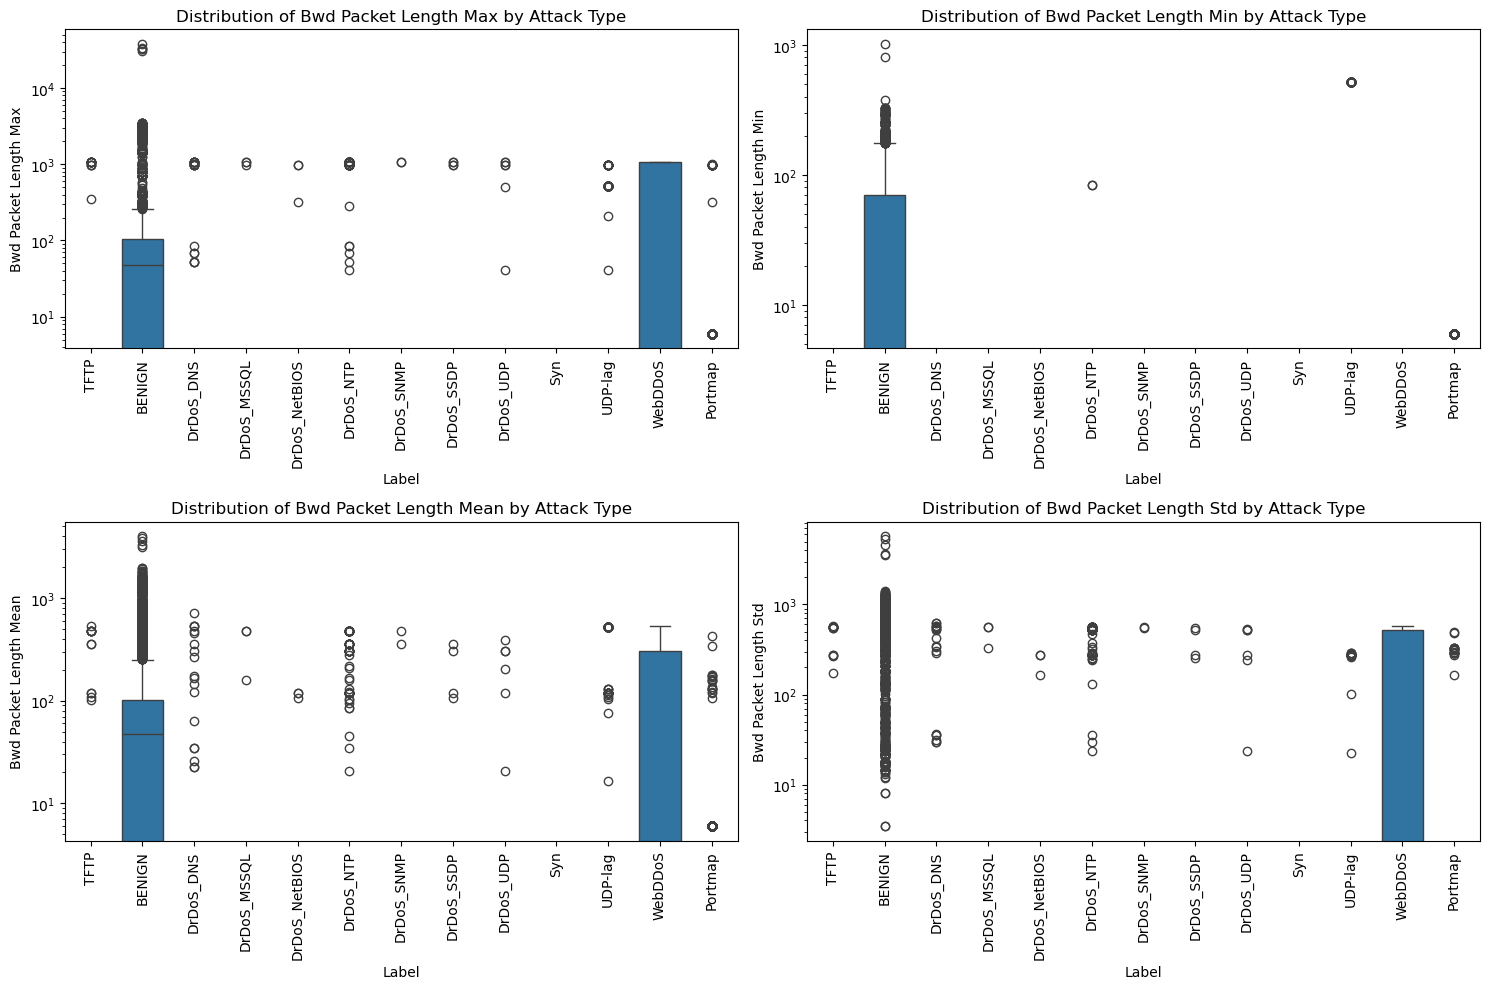


Mean Fwd Packet Length Max by Attack Type:
Label
DrDoS_SNMP       1385.008092
DrDoS_DNS        1379.005799
DrDoS_MSSQL       576.078369
TFTP              512.143365
DrDoS_NTP         435.560862
DrDoS_SSDP        404.883527
DrDoS_UDP         388.512201
DrDoS_NetBIOS     233.209814
Portmap           230.043701
BENIGN            161.303095
WebDDoS           146.550000
UDP-lag            73.923902
Syn                 0.171964
Name: Fwd Packet Length Max, dtype: float64

Mean Fwd Packet Length Min by Attack Type:
Label
DrDoS_SNMP       1384.979925
DrDoS_DNS        1378.771893
DrDoS_MSSQL       576.060050
TFTP              512.040794
DrDoS_SSDP        376.618233
DrDoS_UDP         359.497544
DrDoS_NTP         351.023094
DrDoS_NetBIOS     233.194518
Portmap           229.930248
UDP-lag            70.219573
BENIGN             18.224255
Syn                 0.171322
WebDDoS             0.000000
Name: Fwd Packet Length Min, dtype: float64

Mean Fwd Packet Length Mean by Attack Type:
Label
DrDoS_S

In [147]:
# List of features to analyze
fwd_features = ['Fwd Packet Length Max', 'Fwd Packet Length Min', 'Fwd Packet Length Mean', 'Fwd Packet Length Std']
bwd_features = ['Bwd Packet Length Max', 'Bwd Packet Length Min', 'Bwd Packet Length Mean', 'Bwd Packet Length Std']

# Function to print statistics for a feature
def print_feature_stats(feature):
    print(f"\nStatistics for {feature}:")
    print(data_attack[feature].describe())

# Print statistics for each feature
for feature in fwd_features + bwd_features:
    print_feature_stats(feature)

# Box plots for forward packet length features
plt.figure(figsize=(15, 10))
for i, feature in enumerate(fwd_features, 1):
    plt.subplot(2, 2, i)
    sns.boxplot(x='Label', y=feature, data=data_attack)
    plt.xticks(rotation=90)
    plt.title(f'Distribution of {feature} by Attack Type')
    plt.yscale('log')
plt.tight_layout()
plt.show()

# Box plots for backward packet length features
plt.figure(figsize=(15, 10))
for i, feature in enumerate(bwd_features, 1):
    plt.subplot(2, 2, i)
    sns.boxplot(x='Label', y=feature, data=data_attack)
    plt.xticks(rotation=90)
    plt.title(f'Distribution of {feature} by Attack Type')
    plt.yscale('log')
plt.tight_layout()
plt.show()

# Calculate mean values for each feature by attack type
for feature in fwd_features + bwd_features:
    mean_values = data_attack.groupby('Label')[feature].mean().sort_values(ascending=False)
    print(f"\nMean {feature} by Attack Type:")
    print(mean_values)

In [148]:
data_attack['Flow Bytes/s'].describe()

count    1.177310e+06
mean              inf
std               NaN
min      0.000000e+00
25%      1.324384e+04
50%      4.580000e+08
75%      1.082000e+09
max               inf
Name: Flow Bytes/s, dtype: float64

In parallel, work on cleaning and transforming the feature:

Replace infinite values with a large finite number or a special category.
Investigate zero values to determine if they're valid or should be treated as missing data.
Apply a log transformation to handle the wide range of values.
Create bins or categories based on Flow Bytes/s ranges.

##### Removing socket features

In [149]:
columns_to_remove = ['Unnamed: 0', 'Flow ID', 'Source IP', 'Source Port', 'Destination IP', 'Destination Port', 'Timestamp']

data_attack = data_attack.drop(columns=columns_to_remove)

print(f"Number of features after removal: {len(data_attack.columns)}")
print(data_attack.columns)

Number of features after removal: 81
Index(['Protocol', 'Flow Duration', 'Total Fwd Packets',
       'Total Backward Packets', 'Total Length of Fwd Packets',
       'Total Length of Bwd Packets', 'Fwd Packet Length Max',
       'Fwd Packet Length Min', 'Fwd Packet Length Mean',
       'Fwd Packet Length Std', 'Bwd Packet Length Max',
       'Bwd Packet Length Min', 'Bwd Packet Length Mean',
       'Bwd Packet Length Std', 'Flow Bytes/s', 'Flow Packets/s',
       'Flow IAT Mean', 'Flow IAT Std', 'Flow IAT Max', 'Flow IAT Min',
       'Fwd IAT Total', 'Fwd IAT Mean', 'Fwd IAT Std', 'Fwd IAT Max',
       'Fwd IAT Min', 'Bwd IAT Total', 'Bwd IAT Mean', 'Bwd IAT Std',
       'Bwd IAT Max', 'Bwd IAT Min', 'Fwd PSH Flags', 'Bwd PSH Flags',
       'Fwd URG Flags', 'Bwd URG Flags', 'Fwd Header Length',
       'Bwd Header Length', 'Fwd Packets/s', 'Bwd Packets/s',
       'Min Packet Length', 'Max Packet Length', 'Packet Length Mean',
       'Packet Length Std', 'Packet Length Variance', 'FIN Fla

##### Cleaning the data (removing missing and infinity values)

In [150]:
import numpy as np


# Remove rows with NaN values
data_attack = data_attack.dropna()

# Remove rows with infinity values
data_attack = data_attack.replace([np.inf, -np.inf], np.nan).dropna()

print(f"Shape of data after cleaning: {data_attack.shape}")

Shape of data after cleaning: (1153252, 81)


In [151]:
from sklearn.preprocessing import MinMaxScaler

# Select only numerical columns
numerical_columns = data_attack.select_dtypes(include=[np.number]).columns

# Initialize the MinMaxScaler
scaler = MinMaxScaler()

# Fit and transform the numerical columns
data_attack[numerical_columns] = scaler.fit_transform(data_attack[numerical_columns])

print("Data normalized. Sample of first 5 rows:")
print(data_attack.head())

Data normalized. Sample of first 5 rows:
   Protocol  Flow Duration  Total Fwd Packets  Total Backward Packets  \
0  0.352941   0.000000e+00            0.00001                0.000000   
1  0.352941   3.916667e-07            0.00001                0.000000   
2  0.352941   3.583334e-07            0.00001                0.000000   
3  0.352941   6.870976e-02            0.00003                0.000063   
4  0.352941   0.000000e+00            0.00001                0.000000   

   Total Length of Fwd Packets  Total Length of Bwd Packets  \
0                          0.0                          0.0   
1                          0.0                          0.0   
2                          0.0                          0.0   
3                          0.0                          0.0   
4                          0.0                          0.0   

   Fwd Packet Length Max  Fwd Packet Length Min  Fwd Packet Length Mean  \
0                    0.0                    0.0                   

In [152]:
# Identify columns containing only zeros
zero_columns = data_attack.columns[(data_attack == 0).all()].tolist()

print("Columns containing only zeros:")
print(zero_columns)
print(f"\nNumber of columns with only zeros: {len(zero_columns)}")

Columns containing only zeros:
['Bwd PSH Flags', 'Fwd URG Flags', 'Bwd URG Flags', 'FIN Flag Count', 'PSH Flag Count', 'ECE Flag Count', 'Fwd Avg Bytes/Bulk', 'Fwd Avg Packets/Bulk', 'Fwd Avg Bulk Rate', 'Bwd Avg Bytes/Bulk', 'Bwd Avg Packets/Bulk', 'Bwd Avg Bulk Rate']

Number of columns with only zeros: 12


In [153]:
# Add 'SimilarHTTP' to the list of columns to be removed
columns_to_remove = zero_columns + ['SimillarHTTP']

# Remove zero-only columns and 'SimilarHTTP'
data_attack = data_attack.drop(columns=columns_to_remove)
print("\nZero-only columns and 'SimillarHTTP' have been removed.")

# Print the new shape of the dataset
print(f"\nNew shape of the dataset: {data_attack.shape}")


Zero-only columns and 'SimillarHTTP' have been removed.

New shape of the dataset: (1153252, 68)


In [154]:
# Store the original shape
original_shape = data_attack.shape

# Identify columns that should be numeric
numeric_columns = data_attack.select_dtypes(include=[np.number]).columns

# Function to check if a value is numeric
def is_numeric(x):
    try:
        float(x)
        return True
    except:
        return False

# Create a boolean mask for rows where all values in numeric columns are actually numeric
mask = data_attack[numeric_columns].applymap(is_numeric).all(axis=1)

# Remove rows with non-numeric values
data_attack = data_attack[mask]

# Print results
print(f"Original shape: {original_shape}")
print(f"New shape: {data_attack.shape}")
print(f"Number of rows removed: {original_shape[0] - data_attack.shape[0]}")

# Check data types of all columns
print("\nData types of columns:")
print(data_attack.dtypes)

# Verify that all remaining data is numeric
non_numeric_check = data_attack.select_dtypes(exclude=[np.number])
if non_numeric_check.empty:
    print("\nAll remaining data is numeric.")
else:
    print("\nWarning: Some non-numeric data remains:")
    print(non_numeric_check.dtypes)

# Display first few rows of the cleaned dataset
print("\nFirst few rows of the cleaned dataset:")
print(data_attack.head())

C:\Users\Eric\AppData\Local\Temp\ipykernel_6280\3530521876.py:16: FutureWarning: DataFrame.applymap has been deprecated. Use DataFrame.map instead.
  mask = data_attack[numeric_columns].applymap(is_numeric).all(axis=1)


Original shape: (1153252, 68)
New shape: (1153252, 68)
Number of rows removed: 0

Data types of columns:
Protocol                       float64
Flow Duration                  float64
Total Fwd Packets              float64
Total Backward Packets         float64
Total Length of Fwd Packets    float64
                                ...   
Idle Std                       float64
Idle Max                       float64
Idle Min                       float64
Inbound                        float64
Label                           object
Length: 68, dtype: object

Label    object
dtype: object

First few rows of the cleaned dataset:
   Protocol  Flow Duration  Total Fwd Packets  Total Backward Packets  \
0  0.352941   0.000000e+00            0.00001                0.000000   
1  0.352941   3.916667e-07            0.00001                0.000000   
2  0.352941   3.583334e-07            0.00001                0.000000   
3  0.352941   6.870976e-02            0.00003                0.000063   
4  0

In [155]:
# Store the original shape
original_shape = data_attack.shape

# Create binary labels: 0 for 'BENIGN', 1 for all other labels (attacks)
data_attack['binary_label'] = (data_attack['Label'] != 'BENIGN').astype(int)

# Drop the original 'Label' column
data_attack = data_attack.drop('Label', axis=1)

# Identify columns that should be numeric
numeric_columns = data_attack.columns

# Function to check if a value is numeric
def is_numeric(x):
    return np.issubdtype(type(x), np.number)

# Remove rows with non-numeric values
data_attack = data_attack[data_attack.applymap(is_numeric).all(axis=1)]

# Print results
print(f"Original shape: {original_shape}")
print(f"New shape: {data_attack.shape}")
print(f"Number of rows removed: {original_shape[0] - data_attack.shape[0]}")


C:\Users\Eric\AppData\Local\Temp\ipykernel_6280\2410893209.py:18: FutureWarning: DataFrame.applymap has been deprecated. Use DataFrame.map instead.
  data_attack = data_attack[data_attack.applymap(is_numeric).all(axis=1)]


Original shape: (1153252, 68)
New shape: (1153252, 68)
Number of rows removed: 0


In [156]:
# Check data types of all columns
print("\nData types of columns:")
print(data_attack.info())


Data types of columns:
<class 'pandas.core.frame.DataFrame'>
Index: 1153252 entries, 0 to 1177309
Data columns (total 68 columns):
 #   Column                       Non-Null Count    Dtype  
---  ------                       --------------    -----  
 0   Protocol                     1153252 non-null  float64
 1   Flow Duration                1153252 non-null  float64
 2   Total Fwd Packets            1153252 non-null  float64
 3   Total Backward Packets       1153252 non-null  float64
 4   Total Length of Fwd Packets  1153252 non-null  float64
 5   Total Length of Bwd Packets  1153252 non-null  float64
 6   Fwd Packet Length Max        1153252 non-null  float64
 7   Fwd Packet Length Min        1153252 non-null  float64
 8   Fwd Packet Length Mean       1153252 non-null  float64
 9   Fwd Packet Length Std        1153252 non-null  float64
 10  Bwd Packet Length Max        1153252 non-null  float64
 11  Bwd Packet Length Min        1153252 non-null  float64
 12  Bwd Packet Length Mean 

In [157]:
data_attack['binary_label'].value_counts()

binary_label
1    1148148
0       5104
Name: count, dtype: int64

In [158]:
# Verify that all remaining data is numeric
non_numeric_check = data_attack.select_dtypes(exclude=[np.number])
if non_numeric_check.empty:
    print("\nAll remaining data is numeric.")
else:
    print("\nWarning: Some non-numeric data remains:")
    print(non_numeric_check.dtypes)


All remaining data is numeric.


In [159]:
# Display summary statistics
print("\nSummary statistics:")
print(data_attack.describe())

# Display distribution of binary labels
print("\nDistribution of binary labels:")
print(data_attack['binary_label'].value_counts(normalize=True))


Summary statistics:
           Protocol  Flow Duration  Total Fwd Packets  Total Backward Packets  \
count  1.153252e+06   1.153252e+06       1.153252e+06            1.153252e+06   
mean   9.057382e-01   1.167072e-02       7.866385e-05            3.722514e-06   
std    2.283763e-01   7.869091e-02       2.912246e-03            9.356509e-04   
min    0.000000e+00   0.000000e+00       0.000000e+00            0.000000e+00   
25%    1.000000e+00   0.000000e+00       1.001994e-05            0.000000e+00   
50%    1.000000e+00   0.000000e+00       1.001994e-05            0.000000e+00   
75%    1.000000e+00   8.333334e-07       1.001994e-05            0.000000e+00   
max    1.000000e+00   1.000000e+00       1.000000e+00            1.000000e+00   

       Total Length of Fwd Packets  Total Length of Bwd Packets  \
count                 1.153252e+06                 1.153252e+06   
mean                  2.101593e-02                 1.420571e-06   
std                   6.384006e-02              

In [166]:
data_attack.info()

<class 'pandas.core.frame.DataFrame'>
Index: 1153252 entries, 0 to 1177309
Data columns (total 68 columns):
 #   Column                       Non-Null Count    Dtype  
---  ------                       --------------    -----  
 0   Protocol                     1153252 non-null  float64
 1   Flow Duration                1153252 non-null  float64
 2   Total Fwd Packets            1153252 non-null  float64
 3   Total Backward Packets       1153252 non-null  float64
 4   Total Length of Fwd Packets  1153252 non-null  float64
 5   Total Length of Bwd Packets  1153252 non-null  float64
 6   Fwd Packet Length Max        1153252 non-null  float64
 7   Fwd Packet Length Min        1153252 non-null  float64
 8   Fwd Packet Length Mean       1153252 non-null  float64
 9   Fwd Packet Length Std        1153252 non-null  float64
 10  Bwd Packet Length Max        1153252 non-null  float64
 11  Bwd Packet Length Min        1153252 non-null  float64
 12  Bwd Packet Length Mean       1153252 non-null  

In [160]:
# Optional: Check for near-zero variance features
def near_zero_variance(data, threshold=0.01):
    return data.columns[data.var() < threshold].tolist()

near_zero_cols = near_zero_variance(data_attack)
print("\nColumns with near-zero variance (for information only, not removed):")
print(near_zero_cols)


Columns with near-zero variance (for information only, not removed):
['Flow Duration', 'Total Fwd Packets', 'Total Backward Packets', 'Total Length of Fwd Packets', 'Total Length of Bwd Packets', 'Fwd Packet Length Std', 'Bwd Packet Length Max', 'Bwd Packet Length Min', 'Bwd Packet Length Mean', 'Bwd Packet Length Std', 'Flow IAT Mean', 'Flow IAT Std', 'Flow IAT Max', 'Flow IAT Min', 'Fwd IAT Total', 'Fwd IAT Mean', 'Fwd IAT Std', 'Fwd IAT Max', 'Fwd IAT Min', 'Bwd IAT Total', 'Bwd IAT Mean', 'Bwd IAT Std', 'Bwd IAT Max', 'Bwd IAT Min', 'Fwd PSH Flags', 'Fwd Header Length', 'Bwd Header Length', 'Bwd Packets/s', 'Max Packet Length', 'Packet Length Std', 'Packet Length Variance', 'SYN Flag Count', 'RST Flag Count', 'URG Flag Count', 'CWE Flag Count', 'Down/Up Ratio', 'Avg Bwd Segment Size', 'Fwd Header Length.1', 'Subflow Fwd Packets', 'Subflow Fwd Bytes', 'Subflow Bwd Packets', 'Subflow Bwd Bytes', 'Init_Win_bytes_forward', 'Init_Win_bytes_backward', 'act_data_pkt_fwd', 'Active Mean', 

In [167]:
print("Shape of data_attack:", data_attack.shape)

print("\nColumns in data_attack:")
print(data_attack.columns.tolist())

print("\nDistribution of target variable:")
print(data_attack['binary_label'].value_counts(normalize=True))

print("\nFirst few rows of data_attack:")
print(data_attack.head())

print("\nSummary statistics:")
print(data_attack.describe())

Shape of data_attack: (1153252, 68)

Columns in data_attack:
['Protocol', 'Flow Duration', 'Total Fwd Packets', 'Total Backward Packets', 'Total Length of Fwd Packets', 'Total Length of Bwd Packets', 'Fwd Packet Length Max', 'Fwd Packet Length Min', 'Fwd Packet Length Mean', 'Fwd Packet Length Std', 'Bwd Packet Length Max', 'Bwd Packet Length Min', 'Bwd Packet Length Mean', 'Bwd Packet Length Std', 'Flow Bytes/s', 'Flow Packets/s', 'Flow IAT Mean', 'Flow IAT Std', 'Flow IAT Max', 'Flow IAT Min', 'Fwd IAT Total', 'Fwd IAT Mean', 'Fwd IAT Std', 'Fwd IAT Max', 'Fwd IAT Min', 'Bwd IAT Total', 'Bwd IAT Mean', 'Bwd IAT Std', 'Bwd IAT Max', 'Bwd IAT Min', 'Fwd PSH Flags', 'Fwd Header Length', 'Bwd Header Length', 'Fwd Packets/s', 'Bwd Packets/s', 'Min Packet Length', 'Max Packet Length', 'Packet Length Mean', 'Packet Length Std', 'Packet Length Variance', 'SYN Flag Count', 'RST Flag Count', 'ACK Flag Count', 'URG Flag Count', 'CWE Flag Count', 'Down/Up Ratio', 'Average Packet Size', 'Avg Fwd 

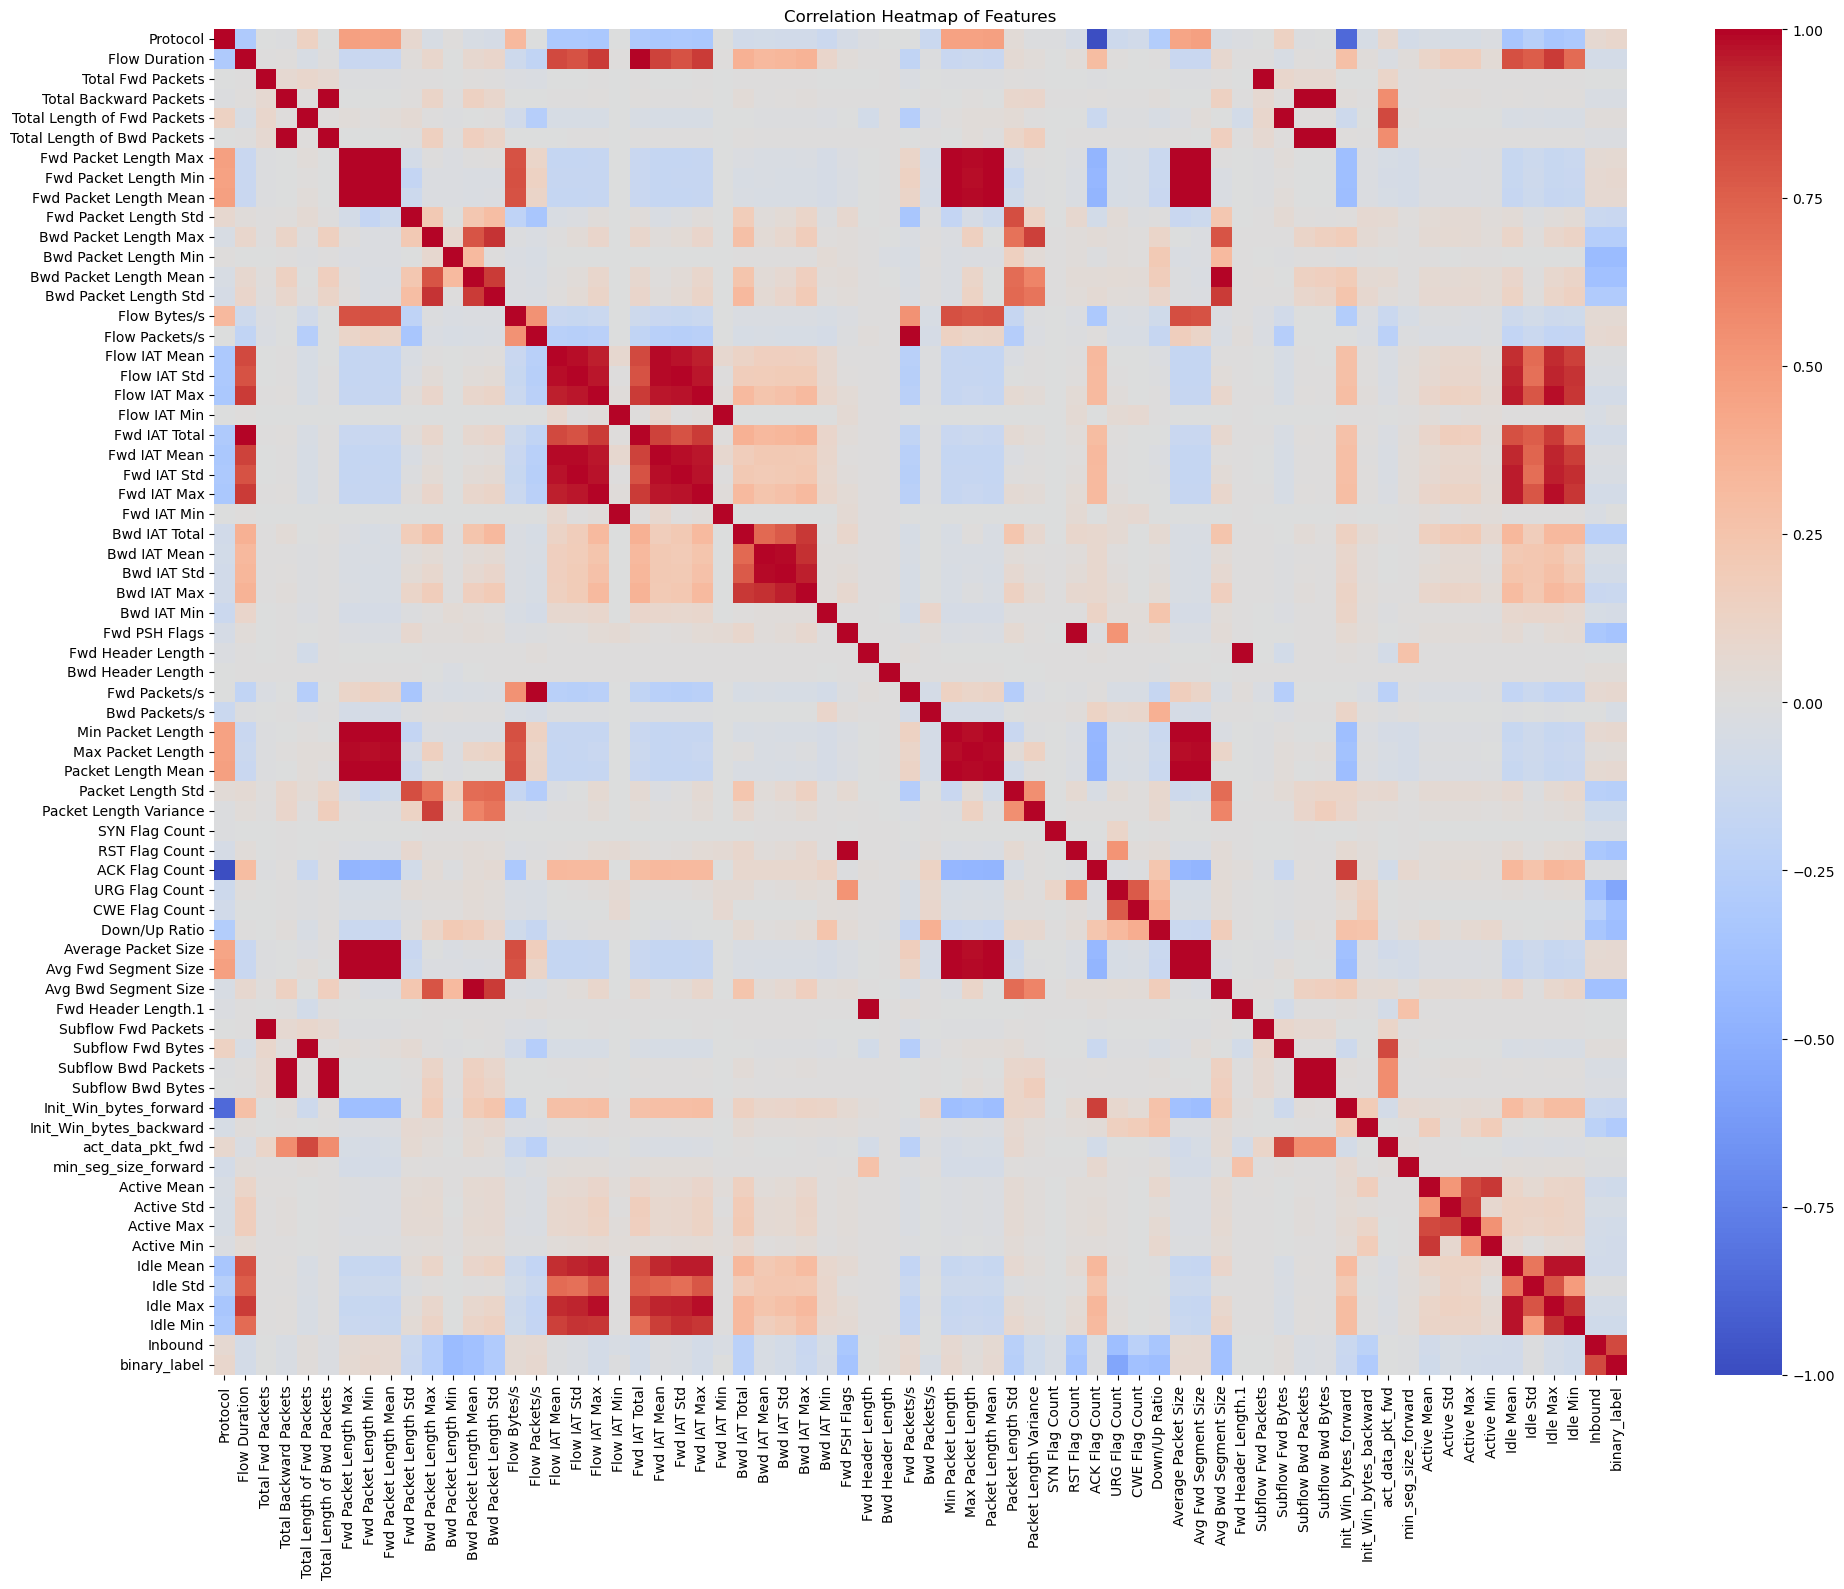

Highly correlated features (threshold = 0.8):
Protocol - ACK Flag Count: -0.99
Protocol - Init_Win_bytes_forward: -0.87
Flow Duration - Flow IAT Mean: 0.83
Flow Duration - Flow IAT Max: 0.88
Flow Duration - Fwd IAT Total: 1.00
Flow Duration - Fwd IAT Mean: 0.85
Flow Duration - Fwd IAT Std: 0.80
Flow Duration - Fwd IAT Max: 0.88
Flow Duration - Idle Mean: 0.81
Flow Duration - Idle Max: 0.88
Total Fwd Packets - Subflow Fwd Packets: 1.00
Total Backward Packets - Total Length of Bwd Packets: 1.00
Total Backward Packets - Subflow Bwd Packets: 1.00
Total Backward Packets - Subflow Bwd Bytes: 1.00
Total Length of Fwd Packets - Subflow Fwd Bytes: 1.00
Total Length of Fwd Packets - act_data_pkt_fwd: 0.83
Total Length of Bwd Packets - Subflow Bwd Packets: 1.00
Total Length of Bwd Packets - Subflow Bwd Bytes: 1.00
Fwd Packet Length Max - Fwd Packet Length Min: 0.99
Fwd Packet Length Max - Fwd Packet Length Mean: 1.00
Fwd Packet Length Max - Min Packet Length: 0.99
Fwd Packet Length Max - Max Pack

In [168]:
import matplotlib.pyplot as plt
import seaborn as sns

# Calculate the correlation matrix
correlation_matrix = data_attack.corr()

# Set up the matplotlib figure
plt.figure(figsize=(20, 16))

# Create a heatmap of the correlation matrix
sns.heatmap(correlation_matrix, annot=False, cmap='coolwarm', vmin=-1, vmax=1, center=0)
plt.title('Correlation Heatmap of Features')
plt.tight_layout()
plt.show()

# Function to print highly correlated features
def print_highly_correlated_features(correlation_matrix, threshold=0.8):
    high_corr = np.where(np.abs(correlation_matrix) > threshold)
    high_corr_list = [(correlation_matrix.index[x], correlation_matrix.columns[y], correlation_matrix.iloc[x, y]) 
                      for x, y in zip(*high_corr) if x != y and x < y]
    
    print(f"Highly correlated features (threshold = {threshold}):")
    for feat1, feat2, corr in high_corr_list:
        print(f"{feat1} - {feat2}: {corr:.2f}")
    
    return high_corr_list

# Print highly correlated features
high_corr_list = print_highly_correlated_features(correlation_matrix, threshold=0.8)

# Identify features to remove, excluding the target variable
features_to_remove = set()
for feat1, feat2, _ in high_corr_list:
    if feat2 != 'binary_label' and feat1 != 'binary_label':
        features_to_remove.add(feat2)

print("\nFeatures suggested for removal:")
print(features_to_remove)

# Create a new dataset with reduced features
data_reduced = data_attack.drop(columns=list(features_to_remove))

print(f"\nOriginal number of features: {data_attack.shape[1]}")
print(f"Number of features after removing highly correlated ones: {data_reduced.shape[1]}")

# Display the first few rows of the reduced dataset
print("\nFirst few rows of the reduced dataset:")
print(data_reduced.head())

# Confirm that 'binary_label' is still in the dataset
if 'binary_label' in data_reduced.columns:
    print("\n'binary_label' is present in the reduced dataset.")
else:
    print("\nWARNING: 'binary_label' is not in the reduced dataset!")

In [169]:
data_reduced.info()

<class 'pandas.core.frame.DataFrame'>
Index: 1153252 entries, 0 to 1177309
Data columns (total 30 columns):
 #   Column                       Non-Null Count    Dtype  
---  ------                       --------------    -----  
 0   Protocol                     1153252 non-null  float64
 1   Flow Duration                1153252 non-null  float64
 2   Total Fwd Packets            1153252 non-null  float64
 3   Total Backward Packets       1153252 non-null  float64
 4   Total Length of Fwd Packets  1153252 non-null  float64
 5   Fwd Packet Length Max        1153252 non-null  float64
 6   Fwd Packet Length Std        1153252 non-null  float64
 7   Bwd Packet Length Max        1153252 non-null  float64
 8   Bwd Packet Length Min        1153252 non-null  float64
 9   Bwd Packet Length Mean       1153252 non-null  float64
 10  Flow Packets/s               1153252 non-null  float64
 11  Flow IAT Min                 1153252 non-null  float64
 12  Bwd IAT Total                1153252 non-null  

In [172]:
# Remove duplicate rows from the dataset
data_reduced = data_reduced.drop_duplicates()

data_reduced.info()

<class 'pandas.core.frame.DataFrame'>
Index: 287197 entries, 0 to 1172278
Data columns (total 30 columns):
 #   Column                       Non-Null Count   Dtype  
---  ------                       --------------   -----  
 0   Protocol                     287197 non-null  float64
 1   Flow Duration                287197 non-null  float64
 2   Total Fwd Packets            287197 non-null  float64
 3   Total Backward Packets       287197 non-null  float64
 4   Total Length of Fwd Packets  287197 non-null  float64
 5   Fwd Packet Length Max        287197 non-null  float64
 6   Fwd Packet Length Std        287197 non-null  float64
 7   Bwd Packet Length Max        287197 non-null  float64
 8   Bwd Packet Length Min        287197 non-null  float64
 9   Bwd Packet Length Mean       287197 non-null  float64
 10  Flow Packets/s               287197 non-null  float64
 11  Flow IAT Min                 287197 non-null  float64
 12  Bwd IAT Total                287197 non-null  float64
 13  Bwd

Epoch 1/10
5385/5385 [==============================] - 74s 12ms/step - loss: 0.0212 - accuracy: 0.9951 - val_loss: 0.0049 - val_accuracy: 0.9981
Epoch 2/10
5385/5385 [==============================] - 143s 27ms/step - loss: 0.0051 - accuracy: 0.9982 - val_loss: 0.0048 - val_accuracy: 0.9981
Epoch 3/10
5385/5385 [==============================] - 98s 18ms/step - loss: 0.0046 - accuracy: 0.9983 - val_loss: 0.0048 - val_accuracy: 0.9981
Epoch 4/10
5385/5385 [==============================] - 105s 20ms/step - loss: 0.0045 - accuracy: 0.9983 - val_loss: 0.0046 - val_accuracy: 0.9981
Epoch 5/10
5385/5385 [==============================] - 117s 22ms/step - loss: 0.0044 - accuracy: 0.9984 - val_loss: 0.0047 - val_accuracy: 0.9981
Epoch 6/10
5385/5385 [==============================] - 62s 12ms/step - loss: 0.0042 - accuracy: 0.9984 - val_loss: 0.0046 - val_accuracy: 0.9981
Epoch 7/10
5385/5385 [==============================] - 97s 18ms/step - loss: 0.0043 - accuracy: 0.9984 - val_loss: 0.004

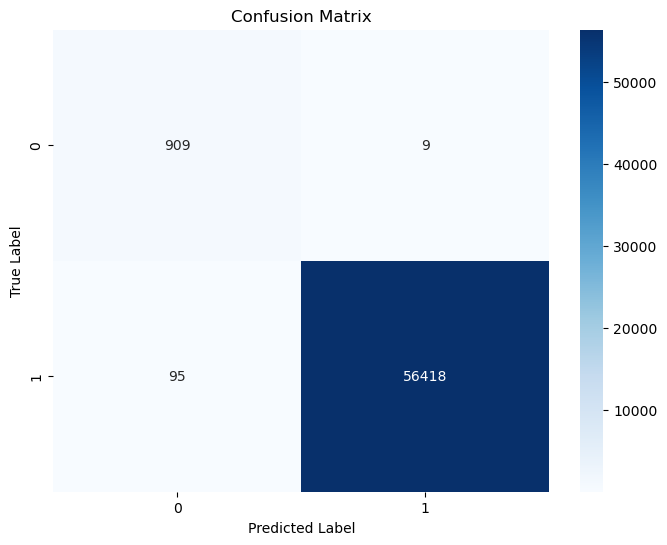

AttributeError: 'numpy.ndarray' object has no attribute 'value_counts'

In [174]:
from sklearn.model_selection import train_test_split
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import LSTM, Dense, Dropout
from tensorflow.keras.callbacks import EarlyStopping
import numpy as np
from sklearn.metrics import precision_score, recall_score, f1_score, roc_auc_score, confusion_matrix
import matplotlib.pyplot as plt
import seaborn as sns

# Separate features and target
X = data_reduced.drop('binary_label', axis=1)
y = data_reduced['binary_label']

# Split the data into train+val and test sets
X_train_val, X_test, y_train_val, y_test = train_test_split(X, y, test_size=0.2, stratify=y, random_state=42)

# Further split train+val into train and validation sets
X_train, X_val, y_train, y_val = train_test_split(X_train_val, y_train_val, test_size=0.25, stratify=y_train_val, random_state=42)

# Function to create sequences
def create_sequences(data, labels, seq_length):
    sequences = []
    sequence_labels = []
    for i in range(len(data) - seq_length + 1):
        sequences.append(data.iloc[i:i+seq_length].values)
        sequence_labels.append(labels.iloc[i+seq_length-1])
    return np.array(sequences), np.array(sequence_labels)

# Create sequences
seq_length = 10  # You can adjust this
X_train_seq, y_train_seq = create_sequences(X_train, y_train, seq_length)
X_val_seq, y_val_seq = create_sequences(X_val, y_val, seq_length)
X_test_seq, y_test_seq = create_sequences(X_test, y_test, seq_length)

# 2. Model Definition
input_dim = X_train_seq.shape[2]  # number of features

model = Sequential([
    LSTM(64, input_shape=(seq_length, input_dim), return_sequences=True),
    Dropout(0.2),
    LSTM(32),
    Dropout(0.2),
    Dense(16, activation='relu'),
    Dense(1, activation='sigmoid')  # 1 output unit for binary classification
])

model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])

# 3. Model Training
early_stopping = EarlyStopping(monitor='val_loss', patience=3, mode='min', restore_best_weights=True)

history = model.fit(
    X_train_seq, y_train_seq,
    epochs=10,
    batch_size=32,
    validation_data=(X_val_seq, y_val_seq),
    callbacks=[early_stopping],
    shuffle=True
)

# 4. Advanced Model Evaluation
y_pred_proba = model.predict(X_test_seq)
y_pred = (y_pred_proba > 0.5).astype(int)

precision = precision_score(y_test_seq, y_pred)
recall = recall_score(y_test_seq, y_pred)
f1 = f1_score(y_test_seq, y_pred)
auc_roc = roc_auc_score(y_test_seq, y_pred_proba)

print(f"Precision: {precision:.4f}")
print(f"Recall: {recall:.4f}")
print(f"F1-score: {f1:.4f}")
print(f"AUC-ROC: {auc_roc:.4f}")

# Confusion Matrix
cm = confusion_matrix(y_test_seq, y_pred)
plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues')
plt.title('Confusion Matrix')
plt.ylabel('True Label')
plt.xlabel('Predicted Label')
plt.show()

# Class distribution
class_distribution = y_test_seq.value_counts(normalize=True)
print("\nClass Distribution in Test Set:")
print(class_distribution)

# 5. Save the model
model.save('lstm_binary_classification_model.keras')

In [175]:
# Class distribution (corrected for NumPy array)
unique, counts = np.unique(y_test_seq, return_counts=True)
class_distribution = dict(zip(unique, counts / len(y_test_seq)))
print("\nClass Distribution in Test Set:")
for class_label, proportion in class_distribution.items():
    print(f"Class {class_label}: {proportion:.4f}")


Class Distribution in Test Set:
Class 0: 0.0160
Class 1: 0.9840


- Model Performance in Context:

The high precision (0.9998) is crucial for a NIDS, as it indicates very few false alarms.
The high recall (0.9983) is also vital, showing the system catches most of the attack traffic.
The near-perfect AUC-ROC (0.9996) suggests excellent discrimination between normal and attack traffic.

- The model is highly effective at identifying DDoS attack traffic with minimal false alarms.
It maintains good performance on normal traffic despite its rarity in the dataset.

In [176]:
model.save('lstm_binary_classification_model.keras')